# From vector spaces to manifolds

## Set up

Before starting this tutorial, we set the working directory to be the root of the geomstats repository. In order to have the code working on your machine, you need to change this path to the path of your geomstats repository.

In [4]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'], 
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /code/geomstats


We import the backend that will be used for geomstats computations and set a seed for reproducibility of the results.

In [6]:
import geomstats.backend as gs

gs.random.seed(2020)

Finally, we import the visualization module.

In [7]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

## From vector spaces to manifolds

In the previous tutorial, we visualized data that naturally belong to manifolds, i.e. generalizations of vector spaces that are allowed to have curvature. 

A simple example of such data is the coordinates of cities on the surface of the earth: they belong to a sphere, which is a manifold.

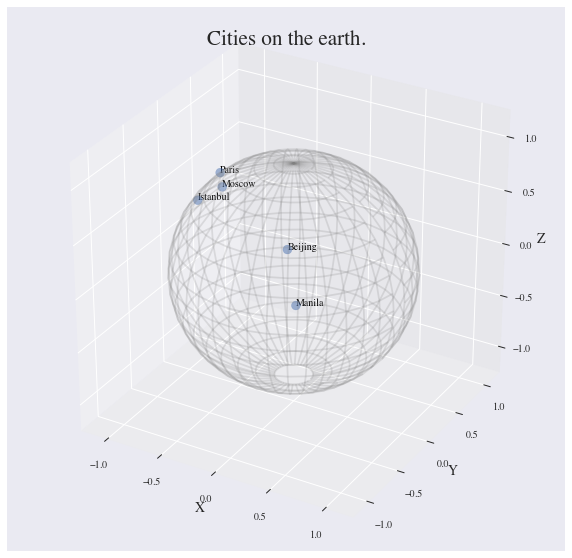

In [10]:
import geomstats.datasets.utils as data_utils

data, names = data_utils.load_cities()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Cities on the earth.');

The purpose of this tutorial is to show how we can perform elementary computations on such data.

## From addition to exponential map 

The elementary operations on a vector space are: addition, substraction and multiplication by a scalar. We can add a vector to a point, substract two points to get a vector, or multiply a vector by a scalar value.

TypeError: Cannot iterate over a scalar tensor.

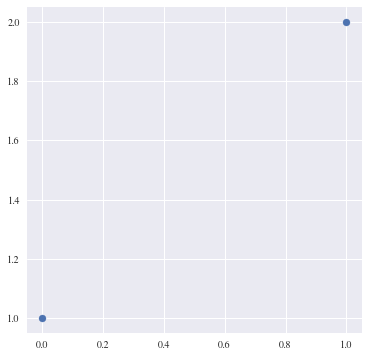

In [13]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

point_a = gs.array([0, 1])
point_b = gs.array([1, 2])
vector = point_b - point_a

ax.scatter(point_a, point_b, label='Points')
ax.arrow(point_a[0], point_a[1], dx=vector[0], dy=vector[1])
#ax.plot(point_a, point_b, linestyle='arrow')

ax.legend();